## Progression of selfplay games
Scores are min_move_dead
* Fixed (LUDR) move order, mcts search 10 lines per move x 4 times.

In [1]:
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
os.chdir('../selfplay/fixed10/')

In [2]:
def get_max(x):
    tiles = []
    for _ in range(16):
        tiles.append(x & 0xF)
        x >>= 4
    return max(tiles)

In [3]:
indices = []
moves = []
scores = []
tiles = []
move_dir = []
i = 0
while True:
    try:
        x = np.load(str(i).zfill(5)+'.npz')
        indices.append(i)
        moves.append(len(x['boards']))
        scores.append(x['score'])
        tiles.append(get_max(x['boards'][-1].item()))
        move_dir.append(np.histogram(np.argsort(x['results'], axis=1)[:, -1], bins=[0,1,2,3,4])[0])
        i += 1
    except FileNotFoundError:
        print('Got {} games'.format(i))
        break
move_dir = np.stack(move_dir)

Got 3400 games


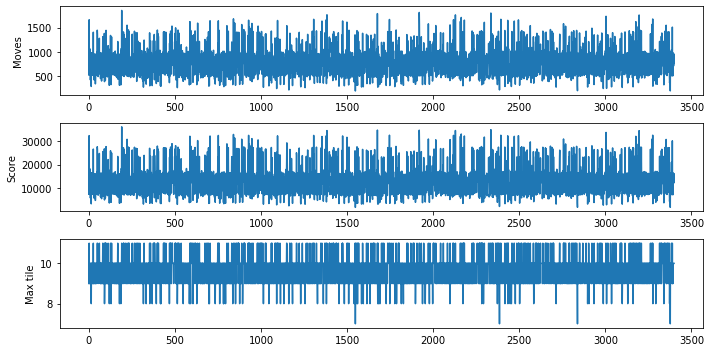

In [4]:
plt.subplots(figsize=(10, 5))
plt.subplot(311)
plt.plot(indices, moves)
plt.ylabel('Moves')
plt.subplot(312)
plt.plot(indices, scores)
plt.ylabel('Score')
plt.subplot(313)
plt.plot(indices, tiles)
plt.ylabel('Max tile')
plt.tight_layout()
plt.show()

Scores and tiles are slowly increasing with each network iteration.

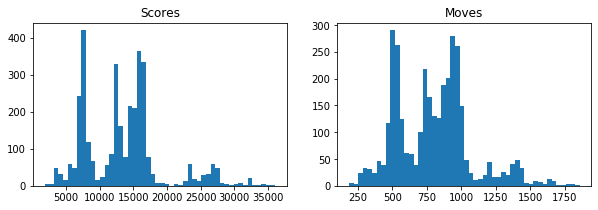

In [5]:
xscore = (min(scores), max(scores))
xmoves = (min(moves), max(moves))
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(scores, range=xscore, bins=50)
plt.title('Scores')
plt.subplot(1, 2, 2)
plt.hist(moves, range=xmoves, bins=50)
plt.title('Moves')
plt.show()

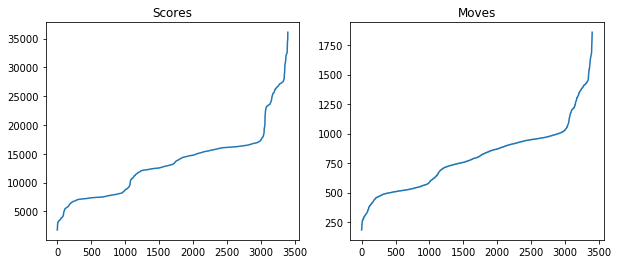

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sorted(scores))
plt.title('Scores')
plt.subplot(1,2,2)
plt.plot(sorted(moves))
plt.title('Moves')
plt.show()

# Move distribution

In [7]:
import pandas as pd
# import seaborn as sns

<BarContainer object of 4 artists>

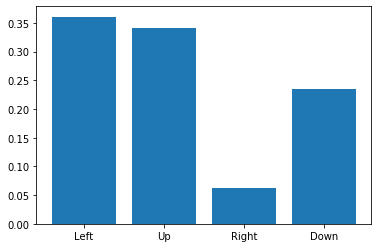

In [8]:
plt.bar(x=['Left','Up','Right','Down'], height=np.sum(move_dir, axis=0)/np.sum(move_dir))